In [71]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('imdb_cleaned.csv')

C:\Users\olivi\AppData\Local\Temp\ipykernel_55368\4144253742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='profit', y='title', data=df_most_profit, palette='viridis')


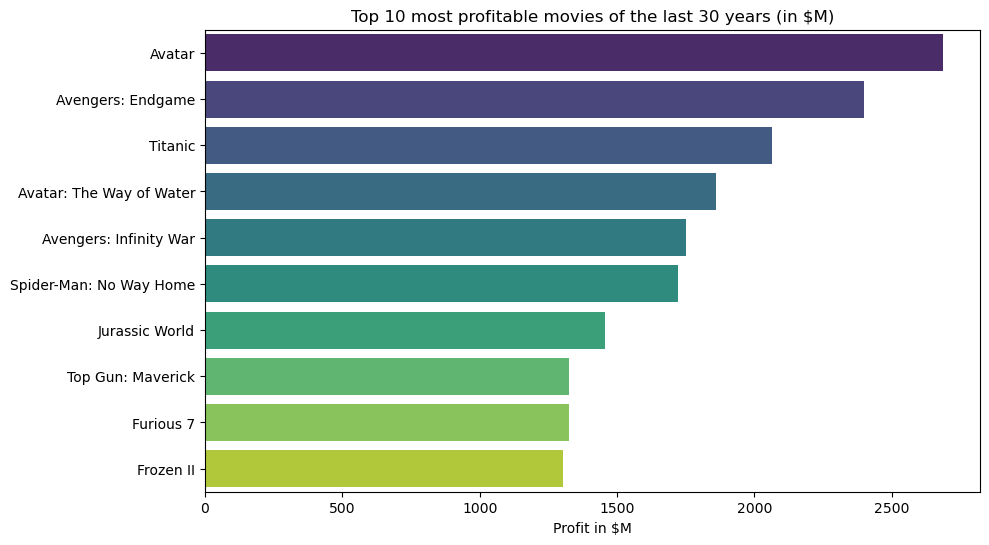

In [73]:
#Top 10 most profitable movies of the last 30 years
df_most_profit = df.sort_values(by='profit', ascending=False).head(10)
df_most_profit = df_most_profit[['title', 'profit']]
df_most_profit = df_most_profit.set_index('title')

plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='title', data=df_most_profit, palette='viridis')
plt.title('Top 10 most profitable movies of the last 30 years (in $M)')
plt.ylabel('')
plt.xlabel('Profit in $M')
plt.show()

In [74]:
df_most_profit.head()

,profit
title,
Avatar,2686.71
Avengers: Endgame,2399.44
Titanic,2064.75
Avatar: The Way of Water,1860.25
Avengers: Infinity War,1752.42


In [75]:
df_group_by_year = df.groupby('year').size().reset_index(name='movie_count')
df_group_by_year = df_group_by_year[df_group_by_year['year'] <= 2021]

In [76]:
df_group_by_year.head(5)

,year,movie_count
0,1995,97
1,1996,94
2,1997,93
3,1998,119
4,1999,103


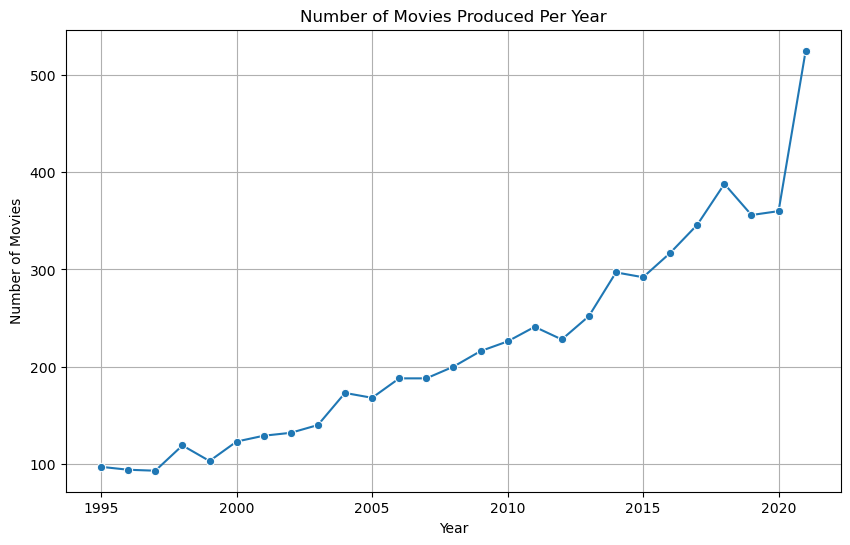

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='movie_count', data=df_group_by_year, marker='o')
plt.title('Number of Movies Produced Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [78]:
df_directors = df.groupby('director')['cumulative_worldwide_gross'].sum().nlargest(10).reset_index()
df_directors.columns = ['Director', 'Total Worldwide Gross in $M']
df_directors


,Director,Total Worldwide Gross in $M
0,James Cameron,7508.71
1,Anthony Russo,6851.96
2,Peter Jackson,6584.61
3,Michael Bay,6503.99
4,David Yates,6423.49
5,Christopher Nolan,6162.80
6,Steven Spielberg,5010.42
7,Sam Raimi,4060.56
8,James Wan,3750.78
9,Roland Emmerich,3648.06


C:\Users\olivi\AppData\Local\Temp\ipykernel_55368\1348061923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Worldwide Gross in $M', y='Director', data=df_directors, palette='viridis')


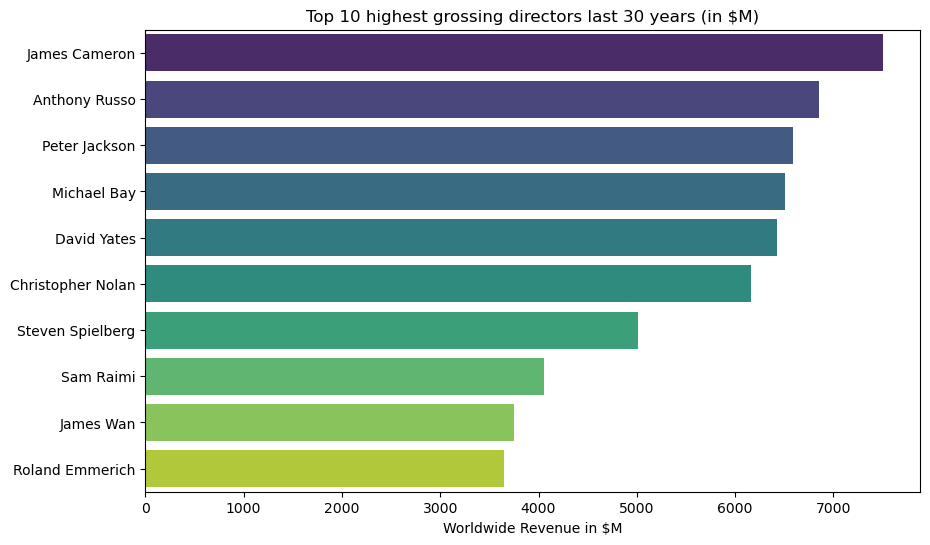

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Worldwide Gross in $M', y='Director', data=df_directors, palette='viridis')
plt.title('Top 10 highest grossing directors last 30 years (in $M)')
plt.ylabel('')
plt.xlabel('Worldwide Revenue in $M')
plt.show()

In [106]:
top_genres = df['main_genre'].value_counts().head(10)
top_genres

main_genre
Action         1843
Drama          1197
Comedy         1186
Animation       970
Horror          452
Crime           406
Adventure       326
Biography       305
Documentary     152
Short            63
Name: count, dtype: int64

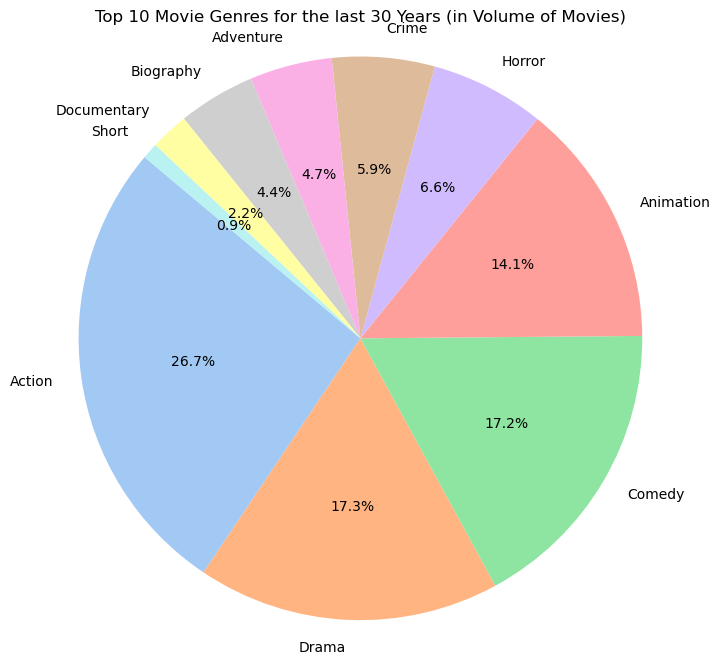

In [108]:
# Pie chart for the top 10 movie genres

plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Movie Genres for the last 30 Years (in Volume of Movies)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

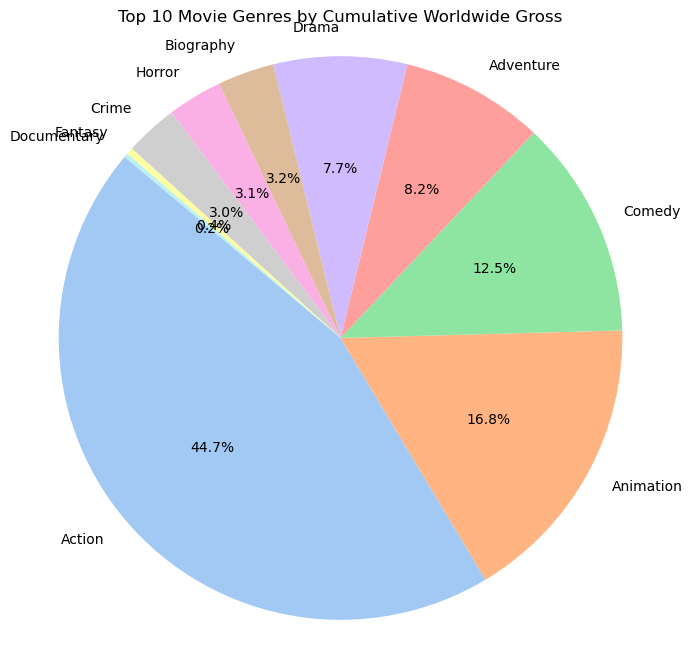

In [151]:
# Group by main_genre and sum the cumulative worldwide gross
genre_gross = df.groupby('main_genre')['cumulative_worldwide_gross'].sum()

# Select the top 10 genres by cumulative worldwide gross
top_genres_gross = genre_gross.nlargest(10)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres_gross, labels=top_genres_gross.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Top 10 Movie Genres by Cumulative Worldwide Gross')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


In [138]:
#Pivot table for average budget of movies by genre and rating
pivot_df = df.pivot_table(index=['main_genre', 'rated'], values='budget_M', aggfunc='mean').head(50)
pivot_df.budget_M = pivot_df.budget_M.round(2)
pivot_df

selected_genres = ["Action", "Drama", "Comedy", "Animation", "Horror"]
df_pivot_genre = pivot_df.loc[selected_genres]

df_pivot_genre

budget_M
main_genre rated            
Action     G          158.34
           PG          94.23
           R           56.53
           Unrated     68.52
Drama      G           96.89
           PG          44.45
           R           45.19
           Unrated     79.61
Comedy     G           71.95
           PG          51.90
           R           45.62
           Unrated     82.95
Animation  G           96.71
           PG          81.38
           R           88.82
           Unrated     97.75
Horror     PG          24.50
           R           42.61
           Unrated     76.95

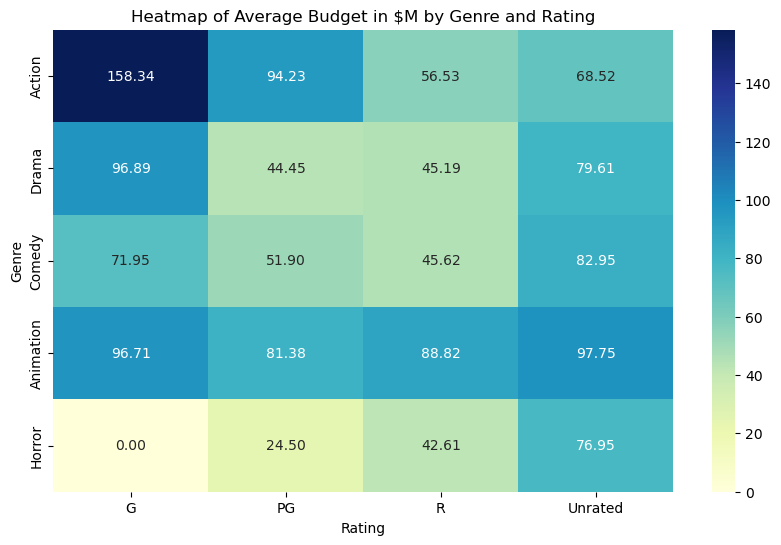

In [150]:


#Heatmap for Genre and Rating by Average Budget

df_pivot_genre_reset = df_pivot_genre.unstack().fillna(0)
df_pivot_genre_reset.columns = [col[-1] for col in df_pivot_genre_reset.columns]  # Extract just the rating (G, PG, etc.)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot_genre_reset, annot=True, cmap='YlGnBu', fmt='.2f')

plt.title('Heatmap of Average Budget in $M by Genre and Rating')
plt.ylabel('Genre')
plt.xlabel('Rating')
plt.show()
